In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

In [2]:
dataset = pd.read_csv('data.csv')
dataset

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [6]:
X = dataset.iloc[:, 1:].values
X

array([[-0.38941991, -0.91279148,  0.64895116, ...,  1.30907338,
         1.46300211,  0.81352704],
       [-0.68924911, -0.45395353,  0.65417452, ..., -0.85216764,
         0.56245739, -2.6805412 ],
       [ 0.80907887,  0.32456779, -1.17060221, ...,  1.33576324,
        -1.11065521, -3.63072301],
       ...,
       [-0.24936396, -0.45954469,  1.88612213, ...,  2.14269334,
         1.6460418 ,  0.64146631],
       [ 0.31140777,  2.18523699,  0.76136684, ..., -1.61095406,
        -0.6162274 , -0.06621112],
       [ 0.75516962,  0.56748316,  1.45676686, ..., -0.97089717,
         1.40498831, -0.71109789]])

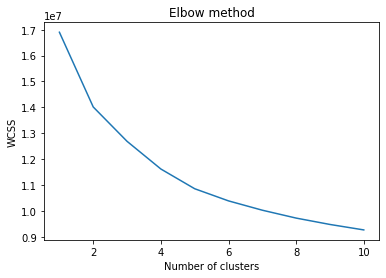

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method")
plt.show()

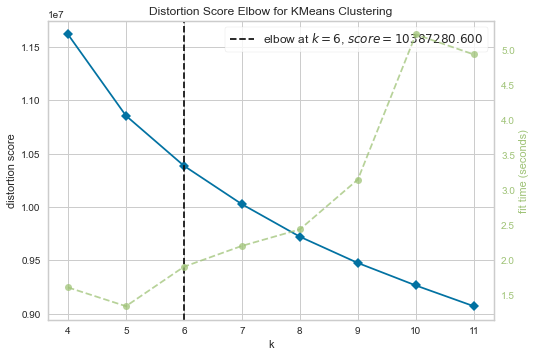

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(4,12))
Elbow_M.fit(X)
Elbow_M.show()

In [20]:
kmeans = KMeans(n_clusters=6, init='k-means++')
y_pred = kmeans.fit_predict(X)

In [21]:
with np.printoptions(threshold=np.inf):
    print(y_pred)

[5 2 5 0 3 3 4 5 3 5 0 3 5 0 0 0 4 3 4 0 0 2 3 2 5 0 0 1 5 0 0 1 1 1 5 3 1
 5 3 4 0 3 0 5 4 5 3 1 0 3 4 0 3 2 1 1 5 1 2 2 4 4 2 1 5 4 3 3 0 0 0 5 0 1
 0 3 5 0 0 5 5 0 0 4 1 0 5 0 3 5 1 5 0 4 0 4 0 4 5 4 0 2 3 5 4 1 3 1 4 2 0
 2 0 3 2 3 2 3 2 0 5 0 0 4 2 5 3 5 0 2 3 4 3 0 3 3 4 1 2 4 3 0 4 5 3 3 0 0
 5 1 3 0 1 4 0 4 2 3 4 4 4 3 5 3 0 0 0 5 5 0 4 3 0 5 0 5 0 5 0 5 0 5 3 2 0
 2 5 4 0 0 3 5 2 4 4 2 5 5 2 5 0 5 4 0 3 1 2 3 0 3 0 4 5 4 0 5 3 2 3 2 1 2
 5 4 1 2 5 0 2 5 1 5 0 2 5 2 1 5 3 0 1 3 1 0 3 4 5 4 1 1 3 5 1 3 5 1 4 1 2
 5 0 3 3 3 0 0 4 3 2 5 0 0 2 4 1 4 5 4 0 3 3 2 2 3 0 1 4 4 5 2 2 1 0 4 5 1
 5 1 3 5 0 3 5 2 0 5 5 2 2 2 5 0 3 0 1 0 3 1 5 0 3 5 3 5 0 2 2 0 2 2 3 5 0
 0 5 5 1 0 0 3 0 1 3 5 3 0 2 2 2 0 5 0 5 2 1 4 5 1 4 3 5 3 1 0 3 0 4 0 5 2
 3 5 0 5 4 3 5 0 5 3 5 3 0 1 3 1 4 3 2 3 2 3 2 1 3 3 3 0 0 2 0 3 2 0 1 2 0
 2 0 2 3 5 0 1 3 5 0 5 4 4 1 4 3 4 0 0 3 4 4 4 4 1 3 5 1 2 5 4 3 5 4 3 2 2
 1 0 3 3 0 3 5 3 5 4 3 1 5 1 5 0 4 0 1 0 5 4 3 1 1 3 2 4 0 5 0 1 3 4 5 0 4
 0 5 4 4 0 3 4 3 0 2 3 3 

<AxesSubplot:ylabel='count'>

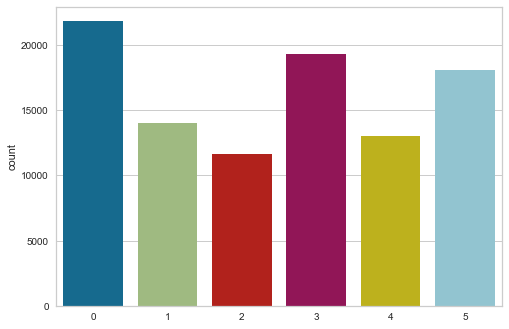

In [22]:
sns.countplot(x = y_pred)